# Data 102 Final Project Notebook
Group: Delilah Catron, Dea Bardhoshi, Derek Punaro, Quoc Huynh


In [ ]:
pip install cpi

     |████████████████████████████████| 29.7 MB 7.0 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import seaborn as sns
from statsmodels.stats.weightstats import ttest_ind as ttest
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import statsmodels.api as sm
from scipy.stats import mannwhitneyu
import plotly.express as px
import cpi
cpi.update()

# Make the graphs a bit prettier, and bigger
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 5)

## Loading in datasets + preemptive data cleaning (utilizing the provided US Bureau of Transport Dataset, and the Google Mobility Dataset): 

In [ ]:
df = pd.read_csv('Monthly_Transportation_Statistics.csv')
df['Date'] = pd.to_datetime(df['Date'])
year = []
for x in np.arange(df.shape[0]):
    year.append(df["Date"][x].year)
df["year"] = year

In [ ]:
def inflation(df):
    current_df = df.loc[df['year'] != 2022]
    new_df = current_df.copy()
    col = []
    for name in (current_df.columns):
        if 'Spending' in name:
            col.append(name)
    for y in col:
        test = []
        for x in np.arange(current_df.shape[0]):
            year = current_df['year'].iloc[x]
            value = current_df[str(y)].iloc[x]
            print('year: ' + str(year))
            print('value: ' + str(value))
            print('changed : ' + str(cpi.inflate(value, year, to=2021)))
            test.append(cpi.inflate(value, year, to=2021))
        new_df[y] = test
    return new_df

In [ ]:
%%capture --no-display 
#inflation(df) outputs pages and pages of the inflation of conversion, so is better to hide it

new_df = inflation(df)
updated_df = pd.concat([new_df, df.loc[df["year"] == 2022]]);

### Filtering California Counties

In [ ]:
df_mobility = pd.read_csv('Global_Mobility_Report.csv')
united_states = df_mobility[df_mobility['country_region'] == 'United States']

In [ ]:
california = united_states[united_states['sub_region_1'] == 'California']
#california = pd.read_csv('California_Counties.csv'): file we already saved from previous checkpoints
california_county = california.groupby('sub_region_2', as_index = False).mean()

# EDA

## Question 1- Multiple Hypothesis Testing Method: 
How did COVID affect transportation in urban versus rural counties in California differently?

### Change in "Retail and Recreation" Mobility Type: top 10 counties (most negative change)

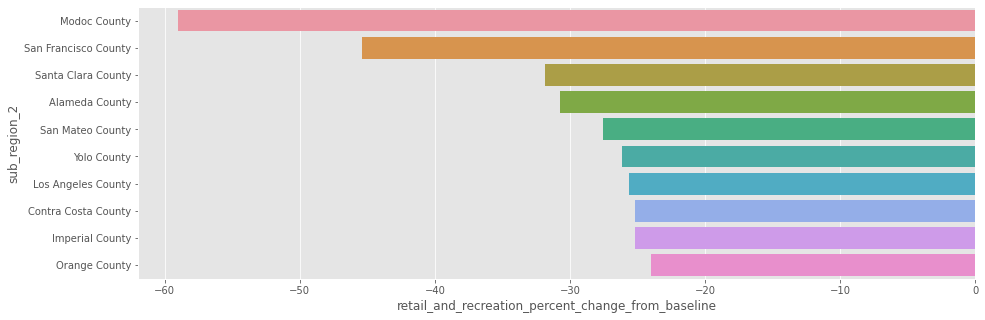

In [ ]:
sorted_county = california_county.sort_values('retail_and_recreation_percent_change_from_baseline')

# top 10 

sns.barplot(y = 'sub_region_2', x = 'retail_and_recreation_percent_change_from_baseline', orient = 'h', data = sorted_county.head(10));

### Change in "Retail and Recreation" Mobility Type: top 10 counties (most positive change)

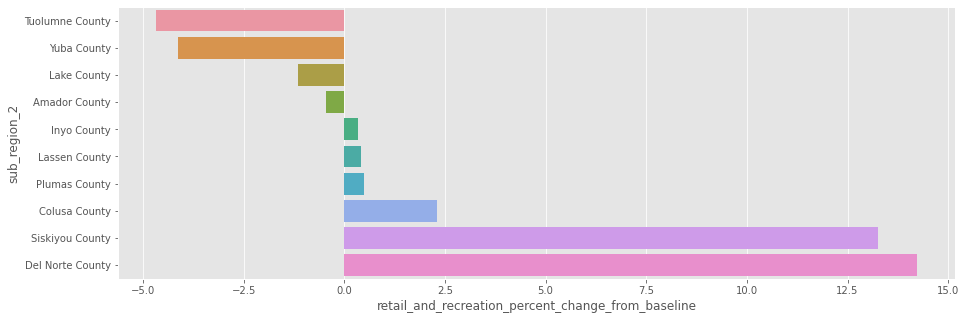

In [ ]:
# bottom 10

sns.barplot(y = 'sub_region_2', x = 'retail_and_recreation_percent_change_from_baseline', orient = 'h', data = sorted_county.tail(10));

### Change in "Workplaces" Mobility Type: top 10 counties (most negative change)


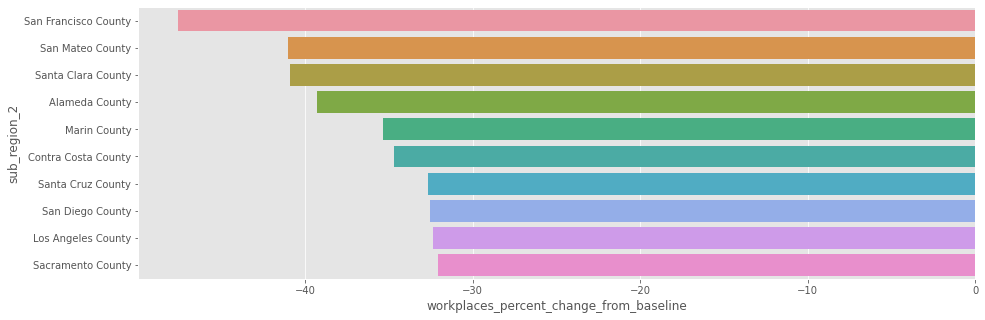

In [ ]:
sorted_county = california_county.sort_values('workplaces_percent_change_from_baseline')

# top 10 

sns.barplot(y = 'sub_region_2', x = 'workplaces_percent_change_from_baseline', orient = 'h', data = sorted_county.head(10));

### Change in "Workplaces" Mobility Type: top 10 counties (most positive change)

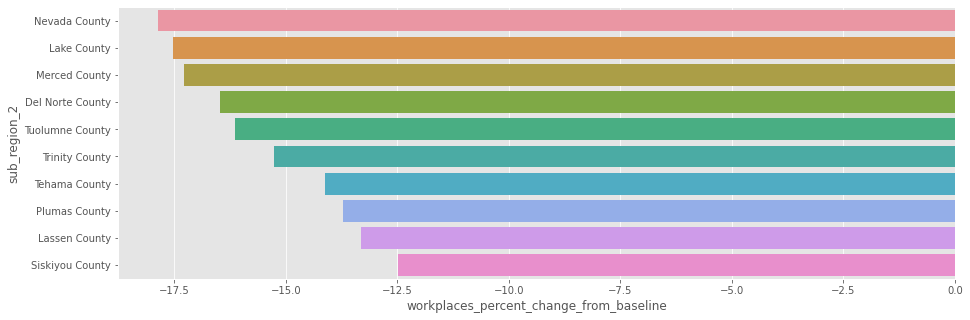

In [ ]:
# top 10 

sns.barplot(y = 'sub_region_2', x = 'workplaces_percent_change_from_baseline', orient = 'h', data = sorted_county.tail(10));

### Change in "Transit Stations" Mobility Type: top 10 counties (most negative change)

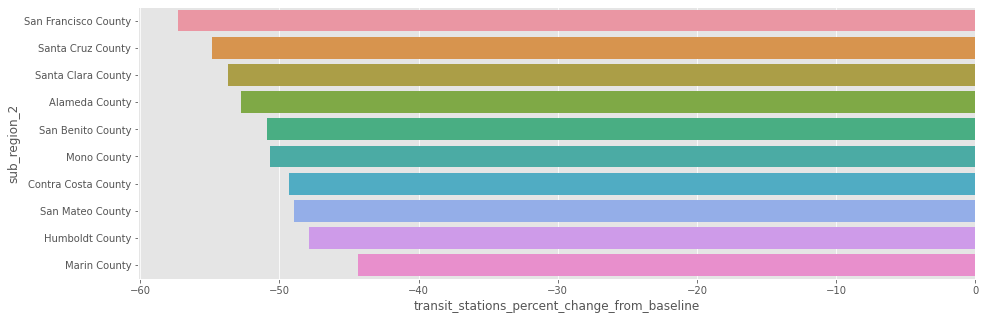

In [ ]:
sorted_county = california_county.sort_values('transit_stations_percent_change_from_baseline')

# top 10 

sns.barplot(y = 'sub_region_2', x = 'transit_stations_percent_change_from_baseline', orient = 'h', data = sorted_county.head(10));

### Change in "Transit Stations" Mobility Type: top 10 counties (most positive change)

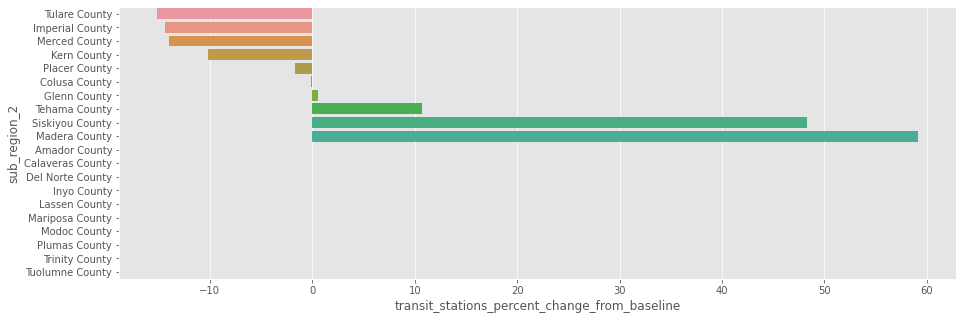

In [ ]:
sns.barplot(y = 'sub_region_2', x = 'transit_stations_percent_change_from_baseline', orient = 'h', data = sorted_county.tail(20));

### Plotting the mobility types and their respective means for Rural and Urban Counties

https://totalescape.com/destinations/list-of-rural-counties-in-california/

Using the website above we are categorizing California Counties as urban versus rural. Rural counties are defined to be the following:

Alpine Mariposa Sierra Trinity Amador Calaveras Inyo Lassen Modoc Mono Plumas Siskiyou Butte Colusa Del Norte El Dorado Glenn Humboldt Kern Lake Mendocino Nevada Placer San Luis Obispo Shasta Tehama Tulare Tuolumne Yolo Yuba.

In [ ]:
list_rural = ['Alpine', 'Mariposa', 'Sierra', 'Trinity', 'Amador', 'Calaveras', 'Inyo', 'Lassen', 'Modoc', 'Mono',
              'Plumas', 'Siskiyou', 'Butte', 'Colusa', 'Del Norte', 'El Dorado', 'Glenn', 'Humboldt', 'Kern',
              'Lake', 'Mendocino', 'Nevada', 'Placer', 'San Luis Obispo', 'Shasta', 'Tehama', 'Tulare', 'Tuolumne',
            'Yolo', 'Yuba']
list_rural = [x + ' County' for x in list_rural]

def urban_rural(x):
    if x in list_rural:
        return 'Rural'
    else:
        return 'Urban'
california['Urban/Rural'] = california['sub_region_2'].apply(lambda x: urban_rural(x))

In [ ]:
california_county = california.groupby('sub_region_2', as_index = False).mean()

In [ ]:
california_county['Urban/Rural'] = california_county['sub_region_2'].apply(lambda x: urban_rural(x))

### Rural v Urban Counties Comparisons: all dates

In [ ]:
r_u_all_dates = california_county.groupby('Urban/Rural', as_index = False).mean()

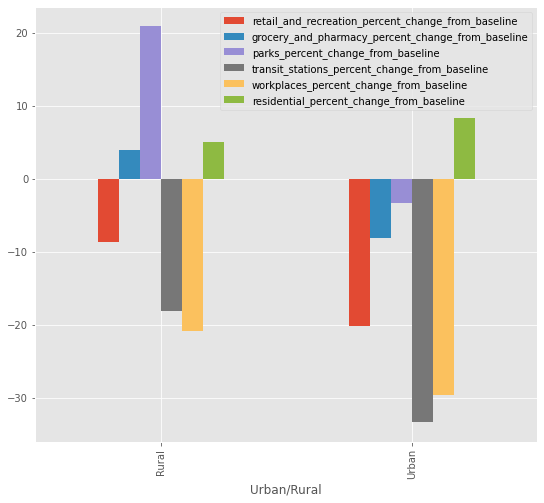

In [ ]:
l_cols = list(r_u_all_dates.columns[2:])
r_u_all_dates.plot(x="Urban/Rural", y=l_cols, kind="bar", figsize=(9, 8));

### Rural v Urban Counties Comparisons: post-May 2021

In [ ]:
california_2021 = california[california['date'] > '2021-05-01']

In [ ]:
grouped_counties = california_2021.groupby('sub_region_2', as_index = False).mean()

In [ ]:
grouped_counties['Urban/Rural'] = grouped_counties['sub_region_2'].apply(lambda x: urban_rural(x))

In [ ]:
rural_urban = grouped_counties.groupby('Urban/Rural', as_index = False).mean()

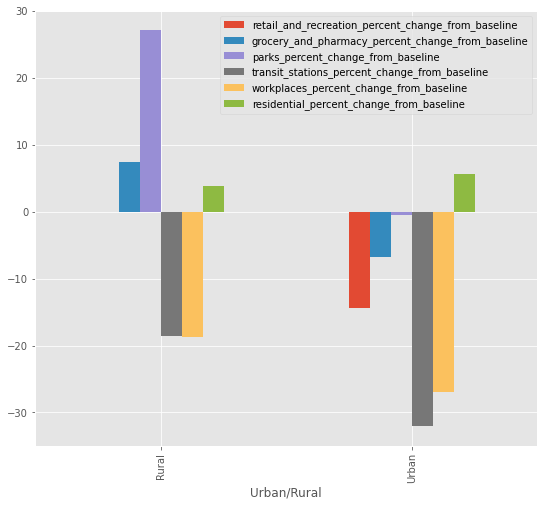

In [ ]:
l_cols = list(rural_urban.columns[2:])
rural_urban.plot(x="Urban/Rural", y=l_cols, kind="bar", figsize=(9, 8));

In [ ]:
rural_urban.iloc[:, 2:].transpose()

,0,1
retail_and_recreation_percent_change_from_baseline,-0.035345,-14.377215
grocery_and_pharmacy_percent_change_from_baseline,7.418218,-6.718649
parks_percent_change_from_baseline,27.105301,-0.478001
transit_stations_percent_change_from_baseline,-18.629998,-31.998405
workplaces_percent_change_from_baseline,-18.737817,-27.019737
residential_percent_change_from_baseline,3.779070,5.705894


In [ ]:
r_u_all_dates.iloc[:, 2:].transpose()

,0,1
retail_and_recreation_percent_change_from_baseline,-8.611066,-20.213089
grocery_and_pharmacy_percent_change_from_baseline,3.907226,-8.079680
parks_percent_change_from_baseline,20.878925,-3.363363
transit_stations_percent_change_from_baseline,-18.118062,-33.322083
workplaces_percent_change_from_baseline,-20.909132,-29.619260
residential_percent_change_from_baseline,5.103368,8.296923


In [ ]:
appended_rural_urban = rural_urban.append(r_u_all_dates)

In [ ]:
appended_rural_urban['Urban/Rural'] = ['Rural All Dates', 'Urban All Dates', 'Rural post may 2021', 'Urban post may 2021']

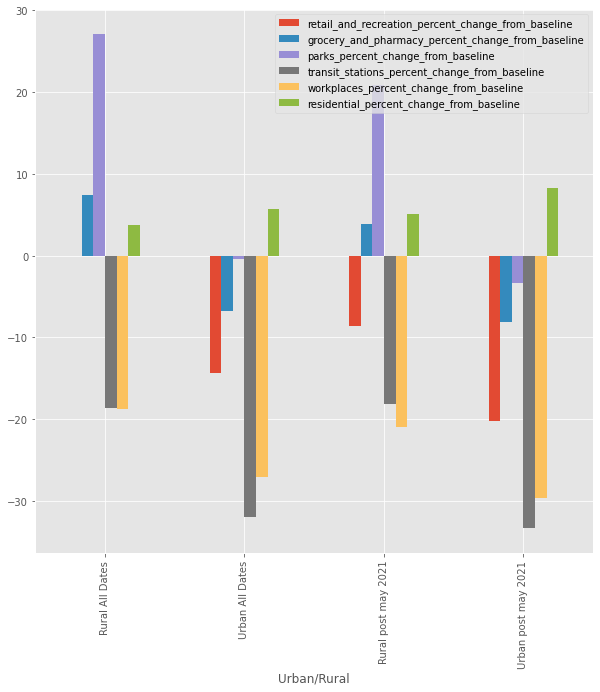

In [ ]:
appended_rural_urban.plot(x="Urban/Rural", y=l_cols, kind="bar", figsize=(10, 10));
plt.savefig('allcomp.jpg')

## Question 2-  Causal Inference Testing Method 
What is the effect of government spending, specifically, infrastructure spending on road safety?


### Urban Rail Ridership Potential Confounding Variable

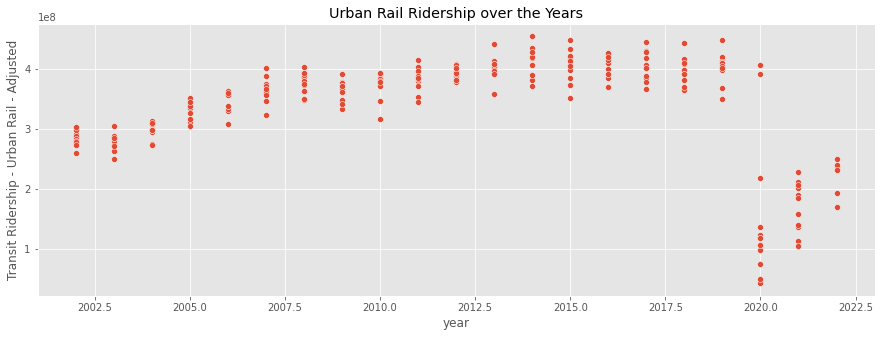

In [ ]:
plot = sns.scatterplot(x="year", y="Transit Ridership - Urban Rail - Adjusted", data=updated_df)
plot.set_title('Urban Rail Ridership over the Years');

### Bus Ridership Potential Confounding Variable

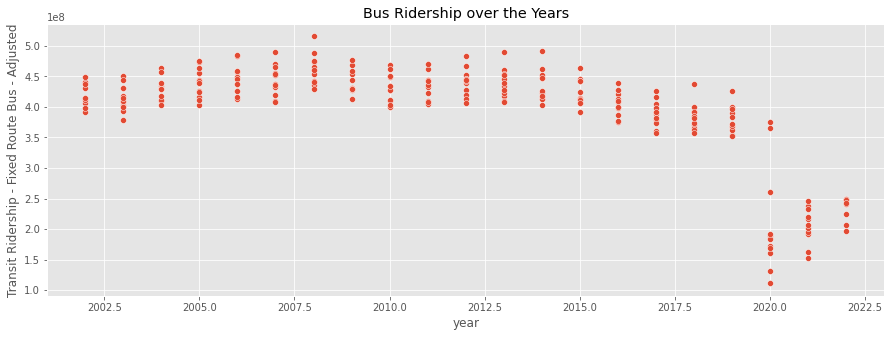

In [ ]:
plot = sns.scatterplot(x="year",y="Transit Ridership - Fixed Route Bus - Adjusted", data=updated_df)
plot.set_title('Bus Ridership over the Years');

### Passenger Rail Ridership Potential Confounding Variable

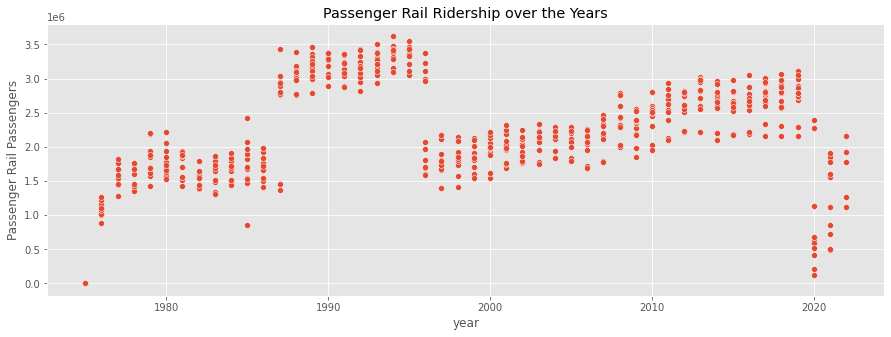

In [ ]:
plot = sns.scatterplot(x="year",y="Passenger Rail Passengers", data=updated_df)
plot.set_title('Passenger Rail Ridership over the Years');

### Unemployment Rate Potential Confounding Variable

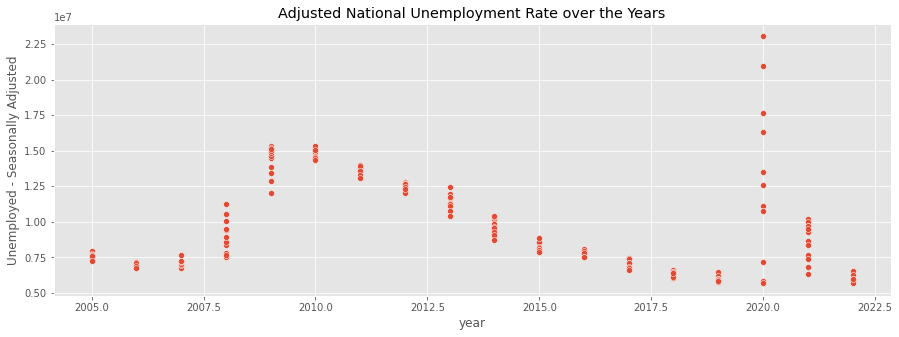

In [ ]:
plot = sns.scatterplot(x="year",y="Unemployed - Seasonally Adjusted", data=updated_df)
plot.set_title('Adjusted National Unemployment Rate over the Years');

### Govt Construction Spending over Time

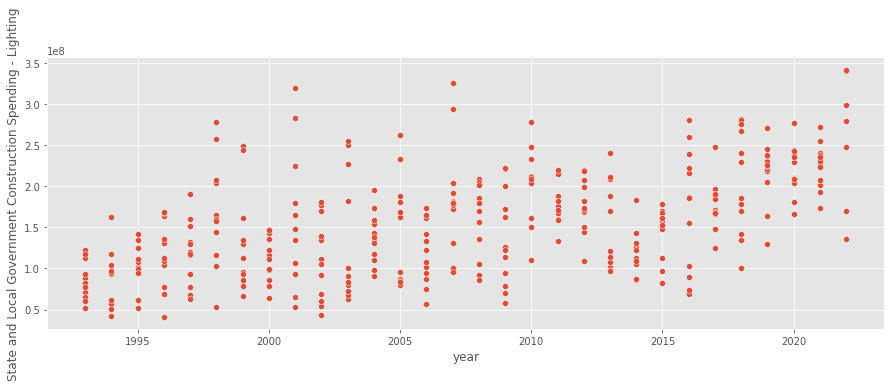

In [ ]:
sns.scatterplot(x = updated_df['year'], y= updated_df['State and Local Government Construction Spending - Lighting']);

The Code Below was made for my tool that was made to help create the rest of our visualizations for question 2 causal inference. Link to it is https://quoc-huynh-data102-noisey-qotk85.streamlit.app/

Note: It will error at first. Please reset the settings "Change X Proportion in Terms of Governement Spending Total?" to "No". Also note that not every variable can be changed to proportion (i.e date).

In [ ]:
# import streamlit as st
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import plotly.express as px
# import seaborn as sns


# df = pd.read_csv('Monthly_Transportation_Statistics.csv')
# df[ 'Date' ] = pd.to_datetime(df['Date'])
# df[ 'covid' ] = df["Date"] > '11/01/2019'
# covid_df = df.loc[df['Date'] > '11/01/2019']
# noncovid_df = df.loc[df['Date'] <= '11/01/2019']
# st.set_page_config(page_title = "Data 102 Project Tool", layout =  "wide")
# st.title("Data 102 Transportation Tool")


# x_axis = st.sidebar.selectbox("Pick Your X Axis Graph", df.columns)
# option = st.sidebar.selectbox("Change X Proportion in Terms of Governement Spending Total?",["Yes", 'No'])
# y_axis = st.sidebar.selectbox("Pick Your Y Axis Graph", df.columns)
# covid_era = st.sidebar.selectbox("Pick Your Data Ranges", ['Covid ( > 12/2019)', "Pre-Covid", "All Dates"])
# width = st.sidebar.slider("plot width", 1, 15, 15)
# height = st.sidebar.slider("plot height", 1, 15, 2)
# if covid_era == "Covid ( > 12/2019)":
#     sdata = covid_df
# elif covid_era == "Pre-Covid":
#     sdata = noncovid_df
# else:
#     sdata = df

# if option == "Yes":
#     new_df = sdata.copy()[['Date', x_axis, y_axis, 'covid', 'State and Local Government Construction Spending - Total']]
#     st.title("IMPORTANT")
#     st.write("Original Data Frame: ")
#     st.dataframe(new_df)
#     st.subheader("By utilizing Proportions We Dropped: " + str(abs(new_df.shape[0] - new_df.dropna().shape[0])) + " Rows")
#     new_df = new_df.dropna() 
#     new_df[x_axis] = (new_df[x_axis])/new_df['State and Local Government Construction Spending - Total']
# else:
#     new_df = sdata.copy()
    
# st.subheader("OUR DATAFRAME")
# st.dataframe(new_df)
# st.subheader("Line Plot")
# figline = plt.figure(figsize=(width, height))
# sns.lineplot(x = x_axis, y = y_axis, data = new_df, color = 'r')
# if option == "Yes":
#     plt.xlabel(x_axis + " (In Proportion to State and Local Government Construction Spending - Total)")
# else:
#     plt.xlabel(x_axis)
# plt.ylabel(y_axis)
# st.pyplot(figline)

# st.subheader("Scatter Plot")
# figline = plt.figure(figsize=(width, height))
# sns.scatterplot(x = x_axis, y = y_axis, data = new_df, color = 'r',  hue = "covid")
# if option == "Yes":
#     plt.xlabel(x_axis + " (In Proportion to State and Local Government Construction Spending - Total)")
# else:
#     plt.xlabel(x_axis)
# plt.ylabel(y_axis)
# st.pyplot(figline)

# st.title("Multi-Period Plot")
# figline = plt.figure(figsize=(width, height))
# sns.lineplot(x = x_axis, y = y_axis, data = new_df, label = "Transition Period")
# sns.lineplot(x = x_axis, y = y_axis, data = covid_df, label = "Covid Times")
# sns.lineplot(x = x_axis, y = y_axis, data = noncovid_df, label = "Non-Covid Times")
# if option == "Yes":
#     plt.xlabel(x_axis + " (In Proportion to State and Local Government Construction Spending - Total)")
# else:
#     plt.xlabel(x_axis)
# plt.ylabel(y_axis)
# st.pyplot(figline)

# st.title("Static Plots")
# st.write("The Graph below is a scatter plot w/ Dates and Highway Fatalities. The size of each dot is dependent on the US's spending. Notice that there isn't much difference at all")
# figline = plt.figure(figsize=(width, height))
# plt.scatter(x = df["Date"], y = df["Highway Fatalities"], s = np.log(df['State and Local Government Construction Spending - Total']), alpha=0.5)
# plt.xlabel("Date")
# plt.ylabel("Highway Fatalities")
# st.pyplot(figline)


# Question 1- Multiple Hypothesis Testing Method
How did COVID affect transportation in urban versus rural counties in California differently?

## Parametric Test:  two-sample t-tests

### Assumptions: Samples follow a normal distribution


In [ ]:
rural_counties = grouped_counties[grouped_counties['Urban/Rural'] == 'Rural']
urban_counties = grouped_counties[grouped_counties['Urban/Rural'] == 'Urban']

### Testing normality assumption for rural counties

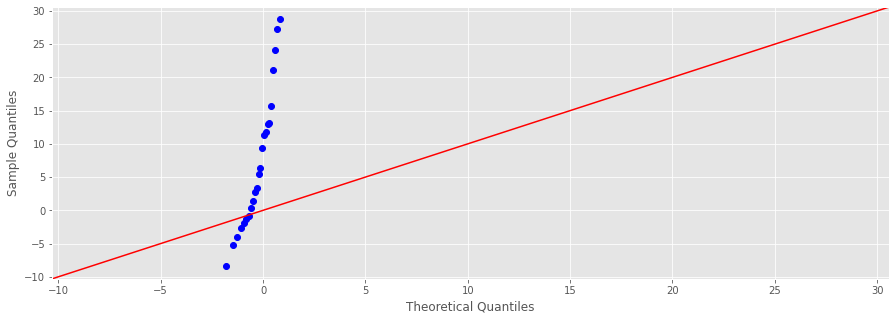

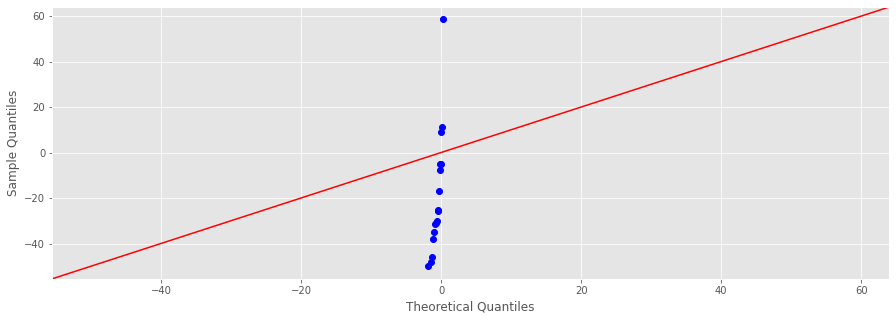

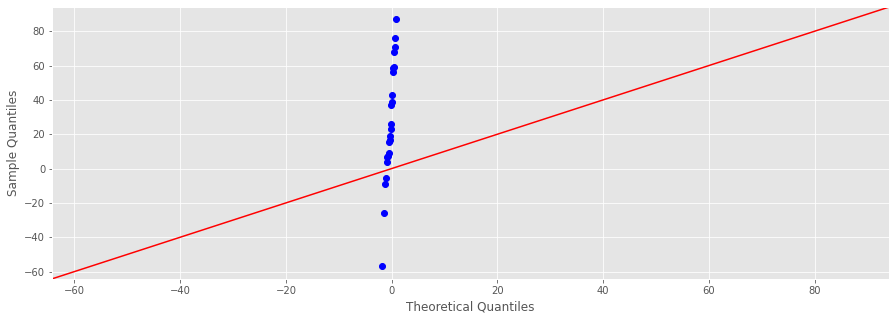

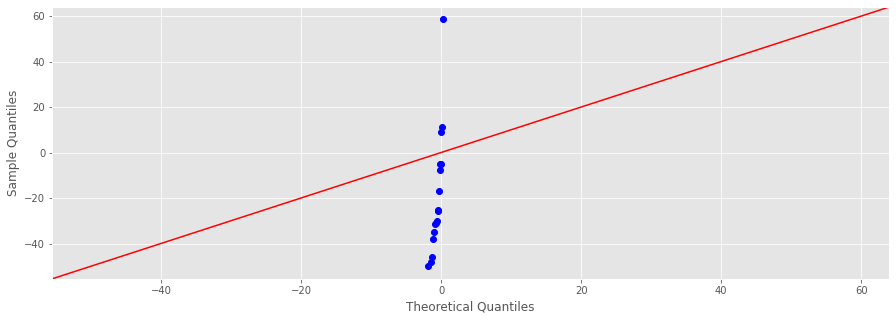

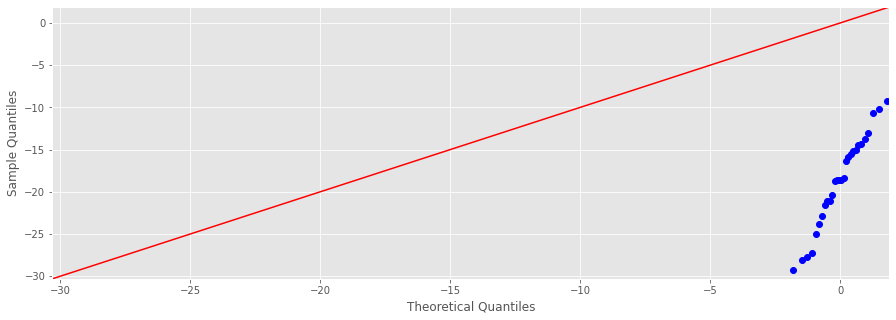

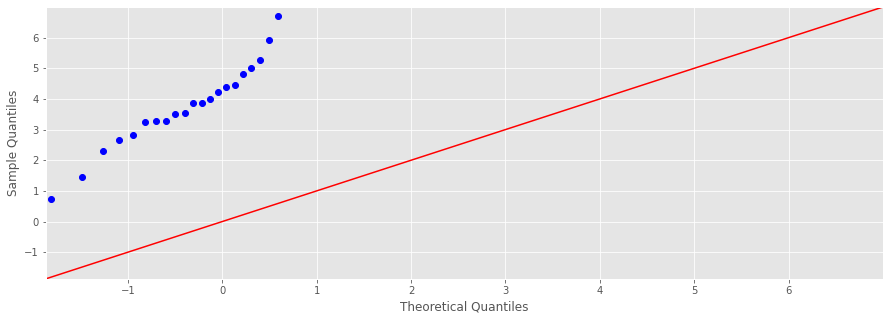

In [ ]:
sm.qqplot(rural_counties['grocery_and_pharmacy_percent_change_from_baseline'], line ='45');
sm.qqplot(rural_counties['transit_stations_percent_change_from_baseline'], line ='45');
sm.qqplot(rural_counties['parks_percent_change_from_baseline'], line ='45');

sm.qqplot(rural_counties['transit_stations_percent_change_from_baseline'], line ='45');
sm.qqplot(rural_counties['workplaces_percent_change_from_baseline'], line ='45');
sm.qqplot(rural_counties['residential_percent_change_from_baseline'], line ='45');

### Testing normality assumption for urban counties 

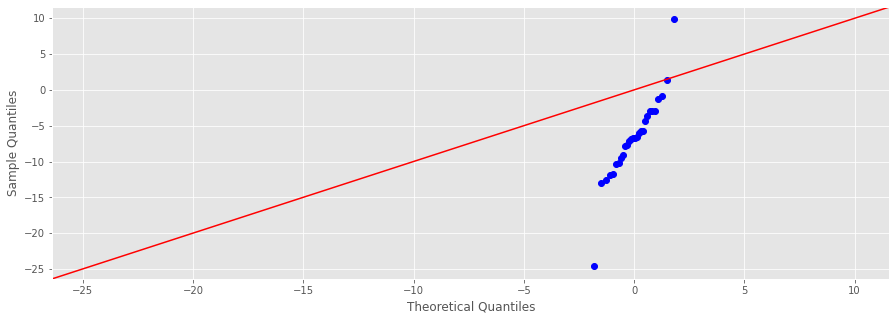

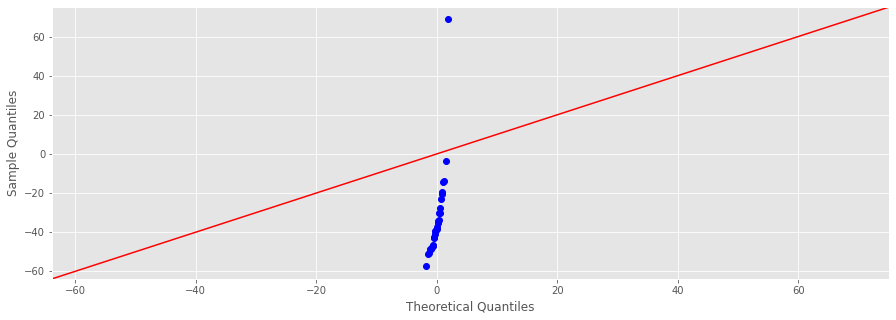

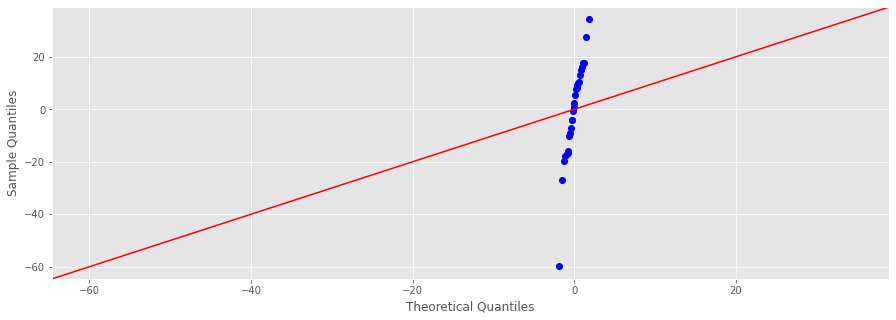

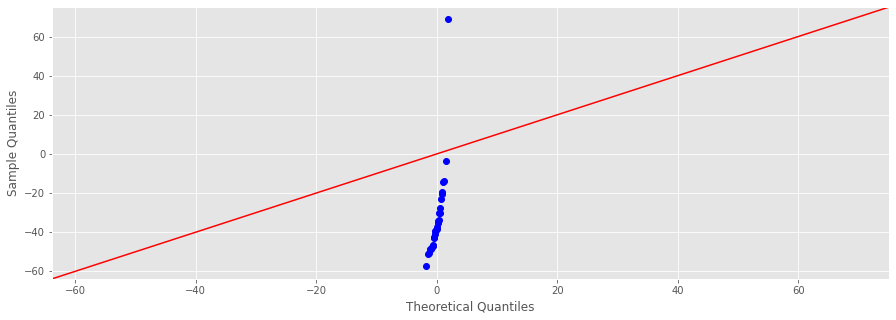

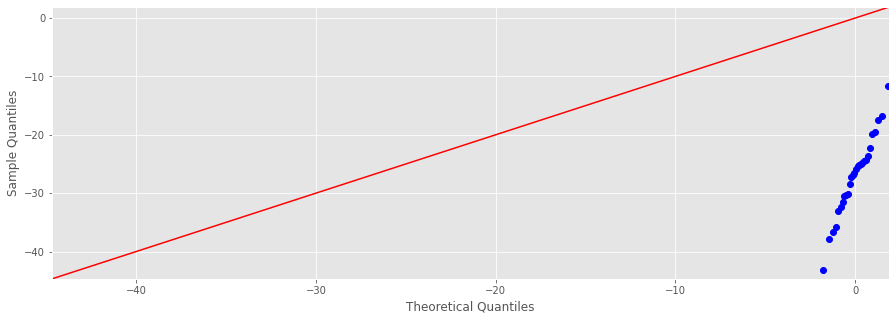

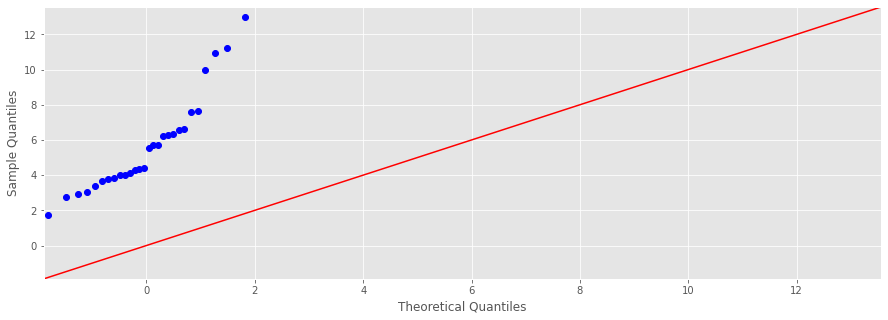

In [ ]:
sm.qqplot(urban_counties['grocery_and_pharmacy_percent_change_from_baseline'], line ='45');
sm.qqplot(urban_counties['transit_stations_percent_change_from_baseline'], line ='45');
sm.qqplot(urban_counties['parks_percent_change_from_baseline'], line ='45');

sm.qqplot(urban_counties['transit_stations_percent_change_from_baseline'], line ='45');
sm.qqplot(urban_counties['workplaces_percent_change_from_baseline'], line ='45');
sm.qqplot(urban_counties['residential_percent_change_from_baseline'], line ='45');

## Nonparametric: Mann-Whitney test

Testing hypothesis 1):  

- Rural/Urban counties had the mean change in grocery and pharmacy movement during the period post-May 2021 (null hypothesis). 
- Rural/Urban counties had different mean change in of grocery and pharmacy movement during the period post-May 2021 (alternative hypothesis). 

In [ ]:
p_grocery_pharmacy = mannwhitneyu(rural_counties['grocery_and_pharmacy_percent_change_from_baseline'].dropna(), 
             urban_counties['grocery_and_pharmacy_percent_change_from_baseline'].dropna(), method="exact")

p_grocery_pharmacy

MannwhitneyuResult(statistic=585.0, pvalue=5.2006425181732265e-08)

Testing hypothesis 2):

Rural/Urban counties had the mean change in "parks" movement during the period post-May 2021 (null hypothesis).
Rural/Urban counties had a different mean change in "parks" movement during the period post-May 2021 (alternative hypothesis).

In [ ]:
p_parks = mannwhitneyu(rural_counties['parks_percent_change_from_baseline'].dropna(), 
             urban_counties['parks_percent_change_from_baseline'].dropna(), method="exact")

p_parks

MannwhitneyuResult(statistic=492.0, pvalue=0.0010070675281679436)

Testing hypothesis 3):

Rural/Urban counties had the same mean change intransit station movement during the period post-May 2021 (null hypothesis).
Rural/Urban counties had a different mean change in transit station movement during the period post-May 2021 (alternative hypothesis).

In [ ]:
p_transit = mannwhitneyu(rural_counties['transit_stations_percent_change_from_baseline'].dropna(), 
             urban_counties['transit_stations_percent_change_from_baseline'].dropna(), method="exact")

p_transit

MannwhitneyuResult(statistic=325.0, pvalue=0.04198927663307768)

Testing hypothesis 4):

Rural/Urban counties had the same mean change in retail and recreation movement during the period post-May 2021 (null hypothesis).
Rural/Urban counties had a different mean change in retail and recreation movement during the period post-May 2021 (alternative hypothesis).

In [ ]:
p_retail = mannwhitneyu(rural_counties['retail_and_recreation_percent_change_from_baseline'].dropna(), 
             urban_counties['retail_and_recreation_percent_change_from_baseline'].dropna(), method="exact")

p_retail

MannwhitneyuResult(statistic=624.0, pvalue=1.2962750350938936e-07)

Testing hypothesis 5):

Rural/Urban counties had the same mean change in workplace movement during the period post-May 2021 (null hypothesis).
Rural/Urban counties had a different mean change in workplace movement during the period post-May 2021 (alternative hypothesis).

In [ ]:
p_workplaces = mannwhitneyu(rural_counties['workplaces_percent_change_from_baseline'].dropna(), 
             urban_counties['workplaces_percent_change_from_baseline'].dropna(), method="exact")

p_workplaces

MannwhitneyuResult(statistic=648.0, pvalue=1.1361658686175658e-05)

Testing hypothesis 6):

Rural/Urban counties had the same mean change in residental movement during the period post-May 2021 (null hypothesis).
Rural/Urban counties had a different mean change in residental movement during the period post-May 2021 (alternative hypothesis).

In [ ]:
p_residential = mannwhitneyu(rural_counties['residential_percent_change_from_baseline'].dropna(), 
             urban_counties['residential_percent_change_from_baseline'].dropna(), method="exact")
p_residential

MannwhitneyuResult(statistic=170.0, pvalue=0.01164531637702839)

## Benjamini-Hochberg algorithm and Bonferroni Correction

In [ ]:
bonferroni_cutoff = 0.05/6
bonferroni_cutoff

0.008333333333333333

In [ ]:
p_vals_categ = pd.DataFrame(data = {
    'categories' : ['grocery_and_pharmacy_percent_change_from_baseline', 'parks_percent_change_from_baseline',
                   'transit_stations_percent_change_from_baseline', 'retail_and_recreation_percent_change_from_baseline',
                   'workplaces_percent_change_from_baseline', 'residential_percent_change_from_baseline'],
    'p_values' : [5.2006425181732265e-08, 0.0010070675281679436, p_transit[1], p_retail[1], p_workplaces[1], p_residential[1]]
})

p_vals_categ

,categories,p_values
0,grocery_and_pharmacy_percent_change_from_baseline,5.200643e-08
1,parks_percent_change_from_baseline,1.007068e-03
2,transit_stations_percent_change_from_baseline,4.198928e-02
3,retail_and_recreation_percent_change_from_base...,1.296275e-07
4,workplaces_percent_change_from_baseline,1.136166e-05
5,residential_percent_change_from_baseline,1.164532e-02


In [ ]:
p_vals_categ['Reject/Fail_to_reject_Bonferroni'] = p_vals_categ['p_values'] <= bonferroni_cutoff

In [ ]:
p_vals_categ

,categories,p_values,Reject/Fail_to_reject_Bonferroni
0,grocery_and_pharmacy_percent_change_from_baseline,5.200643e-08,True
1,parks_percent_change_from_baseline,1.007068e-03,True
2,transit_stations_percent_change_from_baseline,4.198928e-02,False
3,retail_and_recreation_percent_change_from_base...,1.296275e-07,True
4,workplaces_percent_change_from_baseline,1.136166e-05,True
5,residential_percent_change_from_baseline,1.164532e-02,False


In [ ]:
# code below is taken from Lab 1 student solutions

sort_p_val = sorted(p_vals_categ['p_values'])
m = len(sort_p_val)  
k = np.arange(1, m+1)  
# eqn of line: k/m * alpha
line_vals = (k+1)/m * 0.05
# find k (index of largest p value less than the line)
comparisons = k[sort_p_val < line_vals]
new_cutoff = sort_p_val[len(comparisons) - 1]
decisions = [True if i <= new_cutoff else False for i in p_vals_categ['p_values']]

In [ ]:
new_cutoff

0.04198927663307768

In [ ]:
decisions

[True, True, True, True, True, True]

In [ ]:
p_vals_categ['Reject/Fail_to_reject Benjamini Hochberg'] = decisions

In [ ]:
p_vals_categ

,categories,p_values,Reject/Fail_to_reject_Bonferroni,Reject/Fail_to_reject Benjamini Hochberg
0,grocery_and_pharmacy_percent_change_from_baseline,5.200643e-08,True,True
1,parks_percent_change_from_baseline,1.007068e-03,True,True
2,transit_stations_percent_change_from_baseline,4.198928e-02,False,True
3,retail_and_recreation_percent_change_from_base...,1.296275e-07,True,True
4,workplaces_percent_change_from_baseline,1.136166e-05,True,True
5,residential_percent_change_from_baseline,1.164532e-02,False,True


# Question 2-  Causal Inference Testing Method 
What is the effect of government spending, specifically, infrastructure spending on road safety?


### Effects of Inflation on Govt Spending over Time

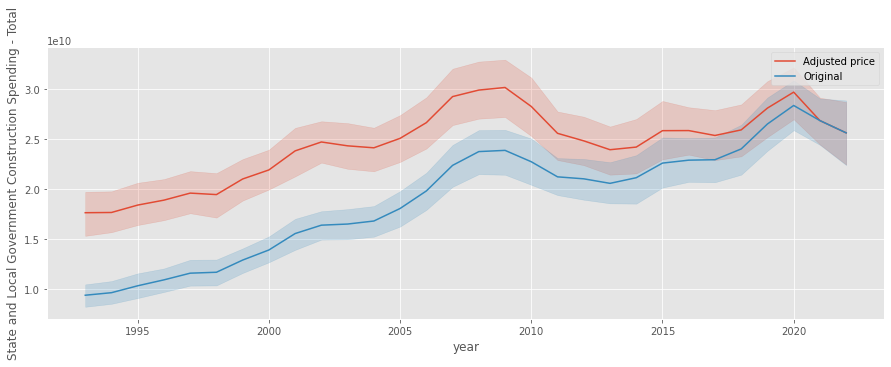

In [ ]:
sns.lineplot(y = updated_df['State and Local Government Construction Spending - Total'],  x = updated_df['year'], label = 'Adjusted price')
sns.lineplot(y = df['State and Local Government Construction Spending - Total'],  x = updated_df['year'], label = "Original");

### Further transport dataset cleaning:

In [ ]:
updated_df['covid'] = updated_df['year'] >= 2020

In [ ]:
transport_clean = updated_df[['Date',
           'Transit Ridership - Other Transit Modes - Adjusted',
            'Transit Ridership - Fixed Route Bus - Adjusted',
            'Transit Ridership - Urban Rail - Adjusted',
            'State and Local Government Construction Spending - Infrastructure',
            'State and Local Government Construction Spending - Transportation',
            'State and Local Government Construction Spending - Health Care',
            'State and Local Government Construction Spending - Total',
            'Unemployment Rate - Seasonally Adjusted',
            'Labor Force Participation Rate - Seasonally Adjusted',
            'Unemployed - Seasonally Adjusted',
            'year',
            'covid',
            'Highway Fatalities Per 100 Million Vehicle Miles Traveled',
            'Highway Fatalities'
                            ]].dropna()

transport_clean = transport_clean.iloc[:49, :]
transport_clean['Date'] = pd.to_datetime(transport_clean['Date'])
def first_p(x):
    if x.month == 1:
        return 1
    else:
        return 0
transport_clean['first_month'] = transport_clean['Date'].apply(lambda x: first_p(x))
transport_clean["proportion_inf"] = transport_clean["State and Local Government Construction Spending - Infrastructure"] / transport_clean["State and Local Government Construction Spending - Total"]
transport_clean["proportion_transport"] = transport_clean["State and Local Government Construction Spending - Transportation"] / transport_clean["State and Local Government Construction Spending - Total"]
transport_clean["proportion_health"] = transport_clean["State and Local Government Construction Spending - Health Care"] / transport_clean["State and Local Government Construction Spending - Total"]


In [ ]:
shifted = transport_clean[['Highway Fatalities']].shift(4)
transport_clean['Shifted_Fatalities'] = shifted

### Examining coorelation between features

In [ ]:
# correlations (measure of linear association between variables)
cols = [
           'Transit Ridership - Other Transit Modes - Adjusted',
            'Transit Ridership - Fixed Route Bus - Adjusted',
            'Transit Ridership - Urban Rail - Adjusted',
            'proportion_transport',
            'proportion_health',
            'proportion_inf',
            'State and Local Government Construction Spending - Total',
            'Unemployment Rate - Seasonally Adjusted',
            'Labor Force Participation Rate - Seasonally Adjusted',
  
        'Unemployed - Seasonally Adjusted']
correl = {}
for c in cols:
    feat = transport_clean[c]
    fatalities_dt = transport_clean['Shifted_Fatalities']
    corr_feat_fatalities = feat.corr(fatalities_dt)
    correl[c] = corr_feat_fatalities
dict(sorted(correl.items(), key=lambda item: item[1]))

{'proportion_health': -0.7051895280284203,
 'proportion_transport': -0.3383431105036931,
 'Unemployment Rate - Seasonally Adjusted': -0.24860641332862055,
 'Unemployed - Seasonally Adjusted': -0.24692127639626232,
 'proportion_inf': -0.22453375793215702,
 'Transit Ridership - Fixed Route Bus - Adjusted': -0.09568547031330672,
 'Labor Force Participation Rate - Seasonally Adjusted': -0.0075508874821032645,
 'Transit Ridership - Urban Rail - Adjusted': 0.3747106713428623,
 'Transit Ridership - Other Transit Modes - Adjusted': 0.7192303997491509,
 'State and Local Government Construction Spending - Total': 0.781645570503509}

In [ ]:
# correlations (measure of linear association between variables)
correl_columns = {}
for c in cols:
    for i in cols:
        if c != i:
            feat = transport_clean[c]
            feat2 = transport_clean[i]
            corr_feat_fatalities = feat.corr(feat2)
            correl_columns[c + ' ' + i] = corr_feat_fatalities
correl_columns

{'Transit Ridership - Other Transit Modes - Adjusted Transit Ridership - Fixed Route Bus - Adjusted': -0.17969984339779654,
 'Transit Ridership - Other Transit Modes - Adjusted Transit Ridership - Urban Rail - Adjusted': 0.7370397758824657,
 'Transit Ridership - Other Transit Modes - Adjusted proportion_transport': 0.09720418677663967,
 'Transit Ridership - Other Transit Modes - Adjusted proportion_health': -0.7155096671791189,
 'Transit Ridership - Other Transit Modes - Adjusted proportion_inf': -0.004504568534090371,
 'Transit Ridership - Other Transit Modes - Adjusted State and Local Government Construction Spending - Total': 0.5690789348841626,
 'Transit Ridership - Other Transit Modes - Adjusted Unemployment Rate - Seasonally Adjusted': -0.45232862768803983,
 'Transit Ridership - Other Transit Modes - Adjusted Labor Force Participation Rate - Seasonally Adjusted': -0.5628305131001929,
 'Transit Ridership - Other Transit Modes - Adjusted Unemployed - Seasonally Adjusted': -0.444401

In [ ]:
dict(sorted(correl.items(), key=lambda item: item[1]))

{'proportion_health': -0.7051895280284203,
 'proportion_transport': -0.3383431105036931,
 'Unemployment Rate - Seasonally Adjusted': -0.24860641332862055,
 'Unemployed - Seasonally Adjusted': -0.24692127639626232,
 'proportion_inf': -0.22453375793215702,
 'Transit Ridership - Fixed Route Bus - Adjusted': -0.09568547031330672,
 'Labor Force Participation Rate - Seasonally Adjusted': -0.0075508874821032645,
 'Transit Ridership - Urban Rail - Adjusted': 0.3747106713428623,
 'Transit Ridership - Other Transit Modes - Adjusted': 0.7192303997491509,
 'State and Local Government Construction Spending - Total': 0.781645570503509}

In [ ]:
colum_corr = pd.DataFrame(index = correl_columns.keys(), data = correl_columns).head(1).transpose()
colum_corr[colum_corr['Transit Ridership - Other Transit Modes - Adjusted Transit Ridership - Fixed Route Bus - Adjusted'] > 0.7]

,Transit Ridership - Other Transit Modes - Adjusted Transit Ridership - Fixed Route Bus - Adjusted
Transit Ridership - Other Transit Modes - Adjusted Transit Ridership - Urban Rail - Adjusted,0.73704
Transit Ridership - Urban Rail - Adjusted Transit Ridership - Other Transit Modes - Adjusted,0.73704
Unemployment Rate - Seasonally Adjusted Unemployed - Seasonally Adjusted,0.99967
Unemployed - Seasonally Adjusted Unemployment Rate - Seasonally Adjusted,0.99967


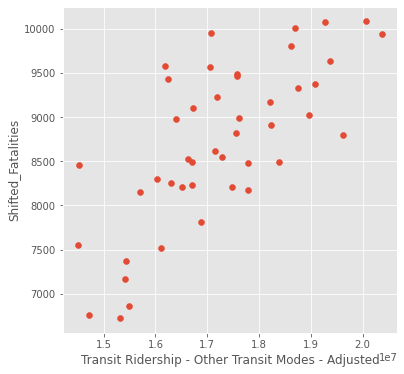

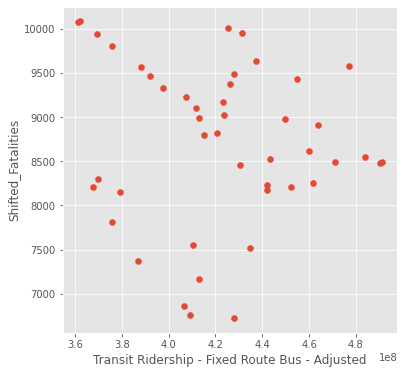

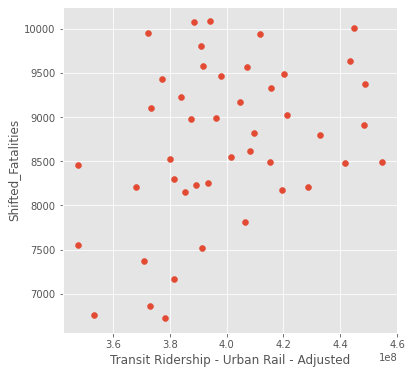

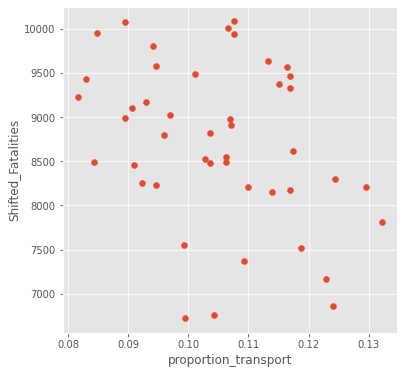

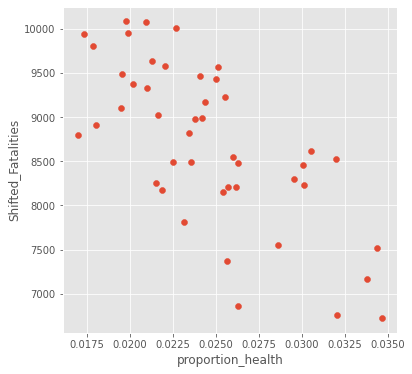

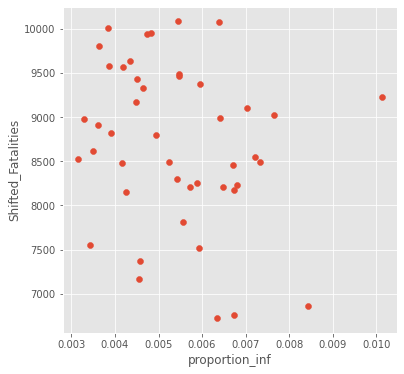

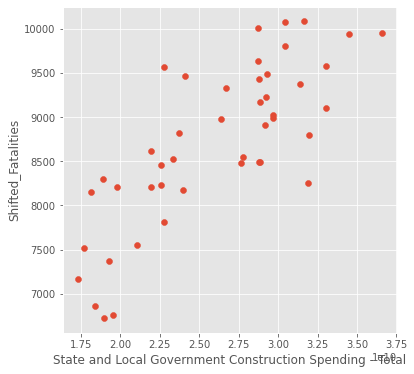

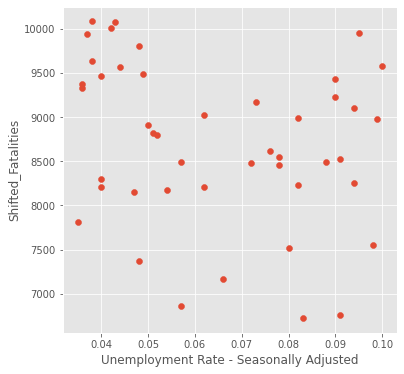

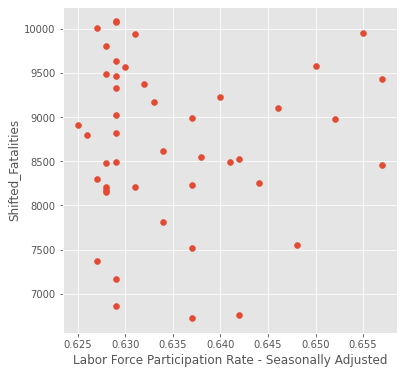

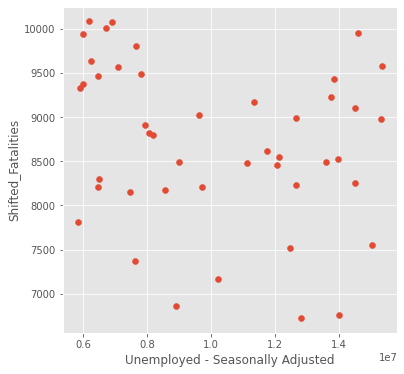

In [ ]:
figures = []
for c in cols:
    for i in ['Shifted_Fatalities']:
        f = plt.figure(figsize=(6,6))
        figures += [f]  # This appends a figure f to the list of figures
        ax = plt.axes()
        plt.scatter(transport_clean[c], transport_clean[i])
        plt.xlabel(c)
        plt.ylabel('Shifted_Fatalities')
        plt.savefig(c + '.png')

In [ ]:
#Here we tried multiple different variables as well. This was the final regression model we ended with.
import statsmodels.api as sm
transport_clean = transport_clean.dropna()
features_selected = ['Transit Ridership - Other Transit Modes - Adjusted', #x1
            'Transit Ridership - Fixed Route Bus - Adjusted', #x2
            'Transit Ridership - Urban Rail - Adjusted', #x3
            'proportion_transport', #x4
            'proportion_health', # x5
            'proportion_inf', #x6
#             'State and Local Government Construction Spending - Total', #x7
            'Unemployment Rate - Seasonally Adjusted', # x8
#             'Labor Force Participation Rate - Seasonally Adjusted' #x9
                     'first_month' # x10,
                    ]

y = transport_clean['Shifted_Fatalities']

X = sm.add_constant(transport_clean[features_selected])

### Performing Outcome Regression

In [ ]:
model = sm.OLS(y, X)
fitted = model.fit()
print(model.fit().summary())

                            OLS Regression Results                            
Dep. Variable:     Shifted_Fatalities   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.763
Method:                 Least Squares   F-statistic:                     18.75
Date:                Mon, 12 Dec 2022   Prob (F-statistic):           1.05e-10
Time:                        12:11:34   Log-Likelihood:                -332.96
No. Observations:                  45   AIC:                             683.9
Df Residuals:                      36   BIC:                             700.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------

### Plotting residuals

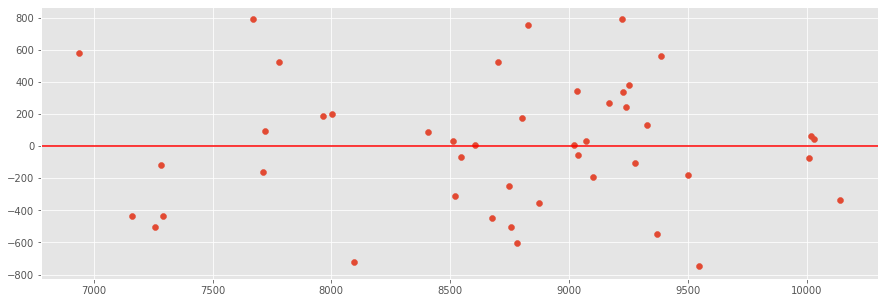

In [ ]:
y_hat = fitted.predict()
plt.scatter(x = y_hat, y = fitted.resid);
plt.axhline(y = 0, color='r', linestyle='-');